In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('../data/main.xlsx', header=0)
df.head()

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.69,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.80,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.46,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.02,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.97,870.00,1.4


In [3]:
df.corr()['happiness'].sort_values()

education_underachievements   -0.556358
bad_conditions                -0.446700
unmet_medical_needs           -0.253131
population                    -0.090328
commute                        0.360781
health_estimate                0.489360
culture                        0.547529
minimum_wage                   0.616758
happiness                      1.000000
Name: happiness, dtype: float64

In [4]:
# features = ['education_underachievements', 'bad_conditions', 'health_estimate', 'culture', 'minimum_wage']
features = [f for f in df.columns if f not in ['country', 'happiness']]
target_feature = ['happiness']
features

['population',
 'bad_conditions',
 'culture',
 'health_estimate',
 'commute',
 'education_underachievements',
 'minimum_wage',
 'unmet_medical_needs']

In [110]:
def split(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe[features], dataframe[target_feature],
                                                    test_size=0.3, random_state=43)
    y_train = y_train.iloc[:,0].ravel()
    y_test = y_test.iloc[:,0].ravel()

    plt.figure(figsize=(10,7), dpi=100)
    for i, x_feature in enumerate(['education_underachievements', 'health_estimate', 'culture', 'minimum_wage']):
        plt.subplot(2, 2, i+1)
        plt.scatter(X_train[x_feature], y_train, label='Training Set')
        plt.scatter(X_test[x_feature], y_test, color='red', label='Testing Set')
        plt.xlabel(x_feature)
        plt.ylabel('happiness')
        plt.legend()
    return X_train, X_test, y_train, y_test

In [6]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])

# X_train,X_test,y_train,y_test=train_test_split(iris.iloc[:,:4], iris.iloc[:,4], test_size=0.3)
# X_train

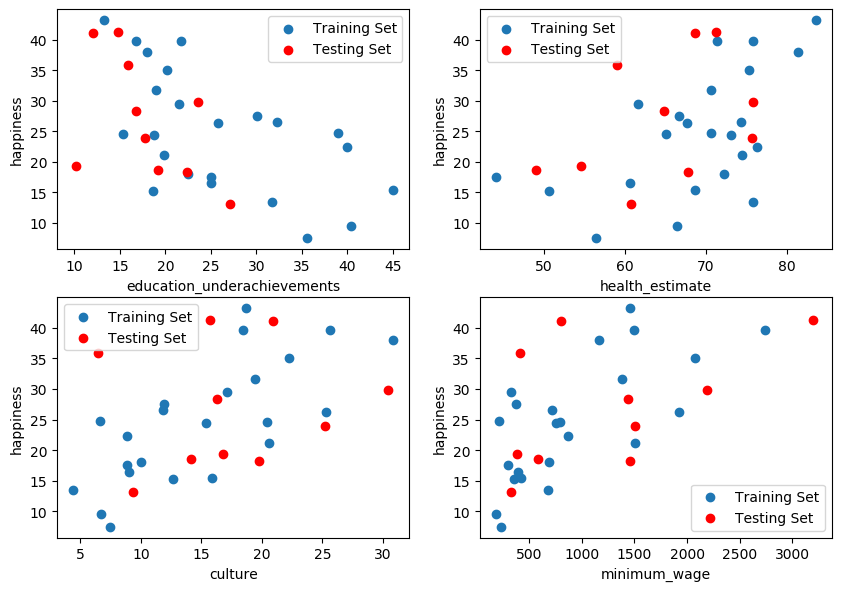

In [111]:
X_train, X_test, y_train, y_test = split(df)

In [119]:
def check_regressor(reg_model, graph=True, verbose=True, tree=False):
    
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    score = reg_model.score(X_test, y_test)
    
    if verbose:
        print(reg_model.__class__.__name__, score)
    
    if graph:
        x_feature = 'health_estimate'
        plt.scatter(X_test[x_feature], y_test, color='red', label='Testing Set')
        plt.scatter(X_test[x_feature], y_pred, color='black', label='Prediction')
        plt.xlabel(x_feature)
        plt.ylabel('happiness')
        plt.legend()
        
    if tree:
        print(reg_model.n_features_)
        print(reg_model.feature_importances_)
        print(reg_model.max_features_)
        print(reg_model.n_outputs_)
        
    return score

## Decision Tree Regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor -0.933819350794532
8
[0.05854489 0.26866444 0.61758336 0.01235152 0.00329326 0.
 0.03956252 0.        ]
8
1


-0.933819350794532

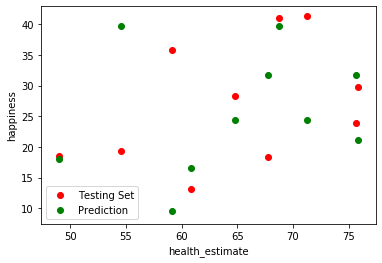

In [11]:
check_regressor(DecisionTreeRegressor(), tree=True)

MaxDepth=1: -0.6809233177855443
MaxDepth=2: -1.2850876975179837
MaxDepth=3: -1.239152907730782
MaxDepth=4: -1.5530264991901193
MaxDepth=5: -0.8994744906290164
MaxDepth=6: -1.0655949374140246
MaxDepth=7: -0.7867139644085146
MaxDepth=8: -1.4588459989346085
MaxDepth=9: -1.5514786536339802
MaxDepth=10: -1.3712733316947252
MaxDepth=11: -1.6802186704816204
MaxDepth=12: -0.8161759772156401
MaxDepth=13: -1.1371621461679626
MaxDepth=14: -0.9703850128973617
MaxDepth=15: -1.3907461852980583
MaxDepth=16: -0.8923231820931621
MaxDepth=17: -0.7525416959518856
MaxDepth=18: -0.7317847125729562
MaxDepth=19: -0.8657084133726767
MaxDepth=20: -1.6921211207578555
MaxDepth=21: -1.7256993790792032
MaxDepth=22: -0.7708269742360674
MaxDepth=23: -1.6062143516052336
MaxDepth=24: -1.149010757323322
MaxDepth=25: -1.7647937000575413
MaxDepth=26: -1.396742350528807
MaxDepth=27: -1.066599526464909
MaxDepth=28: -0.8588913127864264
MaxDepth=29: -1.6648856448173568


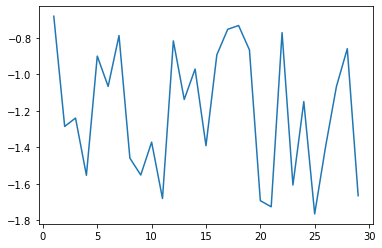

In [12]:
mds = []
for md in range(1, 30, 1):
    tree_reg = DecisionTreeRegressor(max_depth=md)
    s = check_regressor(tree_reg, graph=False, verbose=False)
    mds.append(s)
    print(f'MaxDepth={md}: {s}')
plt.plot(list(range(1, 30)), mds)

## Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor 0.07663012655311775


0.07663012655311775

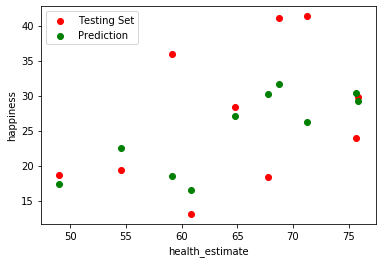

In [14]:
model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=16)
check_regressor(model)

In [15]:
# mds = []
for ne in range(100, 1001, 100):
    model = RandomForestRegressor(n_estimators=ne, max_leaf_nodes=16)
    s = check_regressor(model, graph=False, verbose=False)
    print(f'MaxDepth={ne}: {s}')
# plt.plot(list(range(1, 30)), mds)

MaxDepth=100: 0.17673544159519317
MaxDepth=200: 0.12367473420617359
MaxDepth=300: 0.10381883212620413
MaxDepth=400: 0.13025781216510912
MaxDepth=500: 0.0973366901734013
MaxDepth=600: 0.16782855570598346
MaxDepth=700: 0.14092732023315901
MaxDepth=800: 0.12825332323660965
MaxDepth=900: 0.15442610051651562
MaxDepth=1000: 0.15492923221162935


## Ridge

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [94]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge_reg', Ridge())
])

LinearRegression 0.10739500909433597


0.10739500909433597

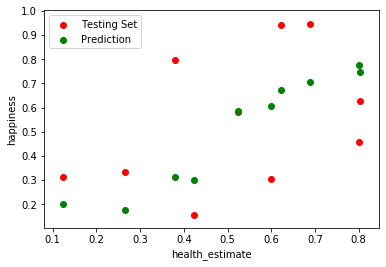

In [118]:
check_regressor(model)

## Scaling

In [22]:
df.head()

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.69,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.80,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.46,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.02,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.97,870.00,1.4


In [23]:
from sklearn import preprocessing

def skaluj(df):
    cols_to_drop = ['country']
    cols = [e for e in df.columns if e not in cols_to_drop]

    x = df.drop(cols_to_drop, axis=1).values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_std = pd.DataFrame(x_scaled, columns=cols)
    df_std.index = df['country']
    print(df_std.shape)
    return df_std

In [24]:
df_std = skaluj(df)

(33, 9)


In [25]:
df_std.head()

,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
country,,,,,,,,,
Austria,0.102850,0.901961,0.173134,0.529301,0.691139,0.571429,0.330564,0.436326,0.000000
Belgium,0.134414,0.383754,0.400000,0.610586,0.769620,0.857143,0.276425,0.436930,0.104294
Bulgaria,0.080364,0.056022,0.250746,0.086200,0.564557,0.365449,0.868233,0.000000,0.110429
Croatia,0.044993,0.252101,0.197015,0.174669,0.420253,0.514950,0.425952,0.070141,0.079755
Cyprus,0.006277,0.417367,0.764179,0.168242,0.815190,0.000000,0.854197,0.227436,0.079755


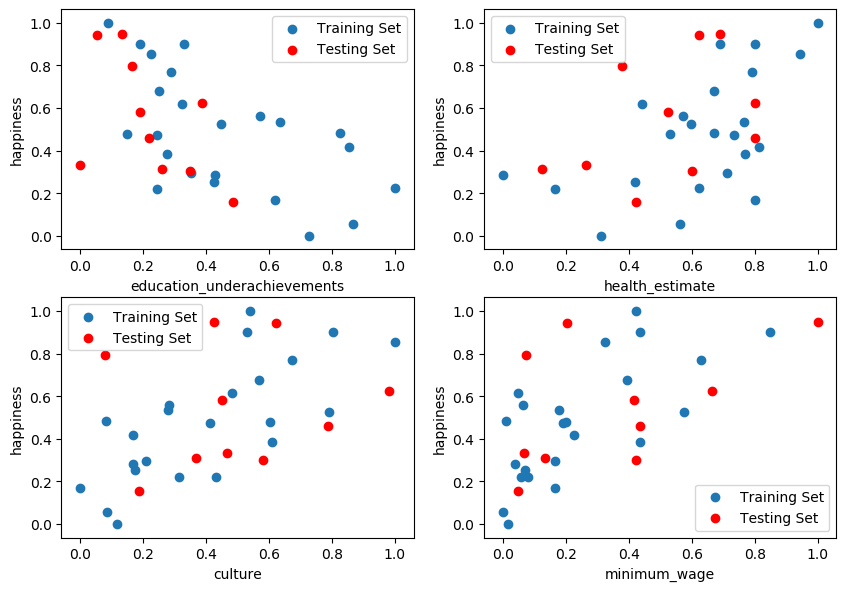

In [112]:
X_train, X_test, y_train, y_test = split(df_std)

## Polynomial Regression

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [137]:
X_train.head()

,population,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
country,,,,,,,,
Serbia,0.079925,0.358209,0.116446,0.311392,0.597342,0.728731,0.016900,0.349693
United Kingdom,0.801940,0.391045,0.567108,0.670886,1.000000,0.252363,0.396163,0.269939
Czechia,0.124516,0.092537,0.482042,0.443038,0.441860,0.323976,0.048953,0.012270
Sweden,0.119440,0.095522,0.673724,0.792405,0.916944,0.288456,0.628639,0.085890
Slovenia,0.020855,0.540299,0.604915,0.531646,0.581395,0.150100,0.201152,0.196319


In [200]:
def produce_matrix(dataframe, n):
    d = dataframe.copy()
    d_col = d.columns
    for st in range(2, n+1):
        for fea in d_col:
            d[f'{fea}^{st}'] = d[fea]**st
    d.insert(0, 'intercept', 1.0)
    return d

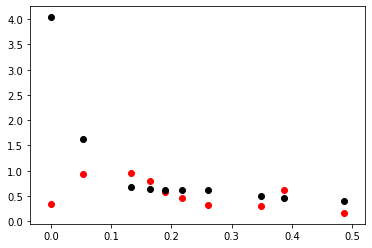

In [205]:
s = 7
# X_train_pow = produce_matrix(X_train, stopen)
# X_test_pow = produce_matrix(X_test, stopen)

# a = produce_matrix(pd.DataFrame(X_train['education_underachievements']), 2)
# b = produce_matrix(pd.DataFrame(X_test['education_underachievements']), 2)

a = pd.DataFrame(X_train['education_underachievements'])
a = produce_matrix(a, s)
a


b = pd.DataFrame(X_test['education_underachievements'])
b = produce_matrix(b, s)
b

# X_train_pow = np.array(a).reshape(-1,1)
# X_test_pow = np.array(b).reshape(-1,1)

# X_test_pow
# b
model = LinearRegression()
model.fit(a, y_train)
y_pred = model.predict(b)

plt.scatter(X_test['education_underachievements'], y_test, color='red')
plt.scatter(X_test['education_underachievements'], y_pred, color='black')

# model.score(X_test_pow, y_test)
# y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

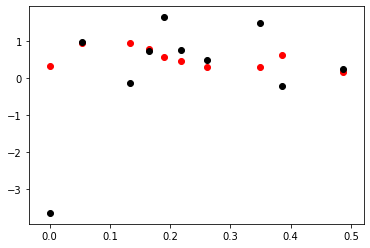

-28.10958459775376

In [38]:
poly = PolynomialFeatures(degree=2)

In [43]:
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

In [54]:
model = LinearRegression()
model.fit(X_train_, y_train)
y_pred = model.predict(X_test_)
y_pred

array([ 0.59554288,  0.48592158,  1.14990627,  0.62650093,  0.30636154,
        0.74642572,  0.86468367,  0.87158745, -0.23664932,  0.53148327])

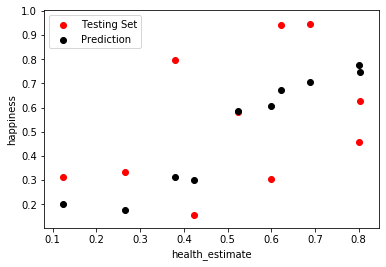

In [117]:
x_feature = 'health_estimate'
plt.scatter(X_test[x_feature], y_test, color='red', label='Testing Set')
plt.scatter(X_test[x_feature], y_pred, color='black', label='Prediction')
plt.xlabel(x_feature)
plt.ylabel('happiness')
plt.legend()

In [65]:
X_train.head()
# df[features]

,population,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
country,,,,,,,,
Serbia,0.079925,0.358209,0.116446,0.311392,0.597342,0.728731,0.016900,0.349693
United Kingdom,0.801940,0.391045,0.567108,0.670886,1.000000,0.252363,0.396163,0.269939
Czechia,0.124516,0.092537,0.482042,0.443038,0.441860,0.323976,0.048953,0.012270
Sweden,0.119440,0.095522,0.673724,0.792405,0.916944,0.288456,0.628639,0.085890
Slovenia,0.020855,0.540299,0.604915,0.531646,0.581395,0.150100,0.201152,0.196319


## Normal Equation

In [64]:
def model_train(X, y):
    
    model = np.dot(np.linalg.pinv(X), y)
    
    return model.reshape(len(model), 1)

In [76]:
model = model_train(X_train, y_train)
model

array([[-0.05237643],
       [-0.2366173 ],
       [ 0.43085839],
       [ 0.48792411],
       [ 0.18403673],
       [-0.03690217],
       [ 0.05219468],
       [-0.18680639]])

In [75]:
p = np.poly1d(model.reshape(8))

0.9888320607531292

In [69]:
np.dot(model, X_test)

ValueError: shapes (8,1) and (10,8) not aligned: 1 (dim 1) != 10 (dim 0)